## 자동차 연비 데이터셋 실습 
(UCI 머신러닝 저장소 제공)

In [1]:
import pandas as pd

### 데이터 탐색

In [3]:
# read_csv() 함수로 df 생성
df = pd.read_csv('datasets\\auto-mpg.csv', header=None)

# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']

In [4]:
# attribute information 특성들!

#mpg : 연비
#cylinders : 실린더수 
#displacement : 배기량
#horsepower: 출력
#weight : 차중
#acceleration : 가속능력
#model year : 출시년도
#origin : 제조국 1(USA), 2(EU), 3(JPN)
#name : 모델명

In [5]:
# 데이터프레임 df의 내용을 일부 확인 
# 데이터가 준비되면 이렇게 데이터를 확인

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [16]:
# 마지막 다섯개 보여준다

df.tail(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger
397,31.0,4,119.0,82.00,2720.0,19.4,82,1,chevy s-10


In [17]:
# df의 모양과 크기 확인
df.shape

# 398개의 샘플과 9개의 특성
# variable inspector에 나와와있다

(398, 9)

In [9]:
# 데이터프레임 df의 기본정보 확인
df.info()

# null인지 아닌지 나오는데 중요하다

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [10]:
# 데이터프레임 df의 자료형 확인 
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model year        int64
origin            int64
name             object
dtype: object

In [11]:
# 시리즈(mpg 열)의 자료형 확인 
df['mpg'].dtypes  #or df.mpg.dtypes

dtype('float64')

In [12]:
# 데이터프레임 df의 기술통계 정보 확인 
df.describe()


,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


### 데이터 개수 확인

In [13]:
# 데이터프레임 df의 각 열이 가지고 있는 원소 개수 확인 
df.count()

mpg             398
cylinders       398
displacement    398
horsepower      398
weight          398
acceleration    398
model year      398
origin          398
name            398
dtype: int64

In [14]:
# df.count()가 반환하는 객체 타입 출력
type(df.count())

pandas.core.series.Series

In [15]:
# 데이터프레임 df의 특정 열이 가지고 있는 고유값 확인 
df['origin'].value_counts()

# 히스토그램의 성격으로 데이터가 몇개나 있는지 알아볼 수 있다.
# origin은 어느나라에서 생산됐는지
# 각 나라 생산국이 미국이 제일 많았다. 1은 미국이었다
# 뭉텅이 뭉텅이로 나오면 이게 의미하는 바가 
# 이 데이터가 어떤 범주를 다루는 데이터라는 것을 파악할 수 있다
# 다 1이 반복되어서 249번 반복됐다는 것이다
# 이것은 분류할 수 있는 데이터의 종류라는 것이다



1    249
3     79
2     70
Name: origin, dtype: int64

In [14]:
df['model year'].value_counts()

# 이건 분류하는게 의미가 없을 정도로 많이 나왔다

73    40
78    36
76    34
82    31
75    30
81    29
80    29
79    29
70    29
77    28
72    28
71    28
74    27
Name: model year, dtype: int64

In [15]:
df['cylinders'].value_counts()

# 범주형으로 갈지 수치형으로 갈지 

4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64

In [16]:
# value_counts 메소드가 반환하는 객체 타입 출력
type(df['origin'].value_counts())

pandas.core.series.Series

### 통계함수

In [17]:
# 평균값 
df.mean()

mpg               23.514573
cylinders          5.454774
displacement     193.425879
weight          2970.424623
acceleration      15.568090
model year        76.010050
origin             1.572864
dtype: float64

In [18]:
df['mpg'].mean()

23.514572864321615

In [19]:
df[['mpg','weight']].mean()

# 두개 이상의 열에 대해

mpg         23.514573
weight    2970.424623
dtype: float64

In [20]:
# 중간값 
df.mean()

mpg               23.514573
cylinders          5.454774
displacement     193.425879
weight          2970.424623
acceleration      15.568090
model year        76.010050
origin             1.572864
dtype: float64

In [21]:
df['mpg'].mean()

23.514572864321615

In [22]:
# 최대값 
df.max()

mpg                         46.6
cylinders                      8
displacement                 455
horsepower                     ?
weight                      5140
acceleration                24.8
model year                    82
origin                         3
name            vw rabbit custom
dtype: object

In [23]:
df['mpg'].max()

46.6

In [24]:
# 최소값 
df.min()

mpg                                   9
cylinders                             3
displacement                         68
horsepower                        100.0
weight                             1613
acceleration                          8
model year                           70
origin                                1
name            amc ambassador brougham
dtype: object

In [25]:
df['mpg'].min()

9.0

In [26]:
# 표준편차 
df.std()

mpg               7.815984
cylinders         1.701004
displacement    104.269838
weight          846.841774
acceleration      2.757689
model year        3.697627
origin            0.802055
dtype: float64

In [27]:
df['mpg'].std()

7.815984312565782

In [28]:
# 상관계수 
df.corr()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000


In [29]:
df[['mpg','weight']].corr()

,mpg,weight
mpg,1.000000,-0.831741
weight,-0.831741,1.000000


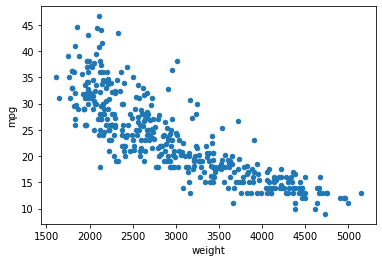

In [30]:
df.plot(kind="scatter", x='weight', y='mpg')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F82F5C8A88>,
      dtype=object)

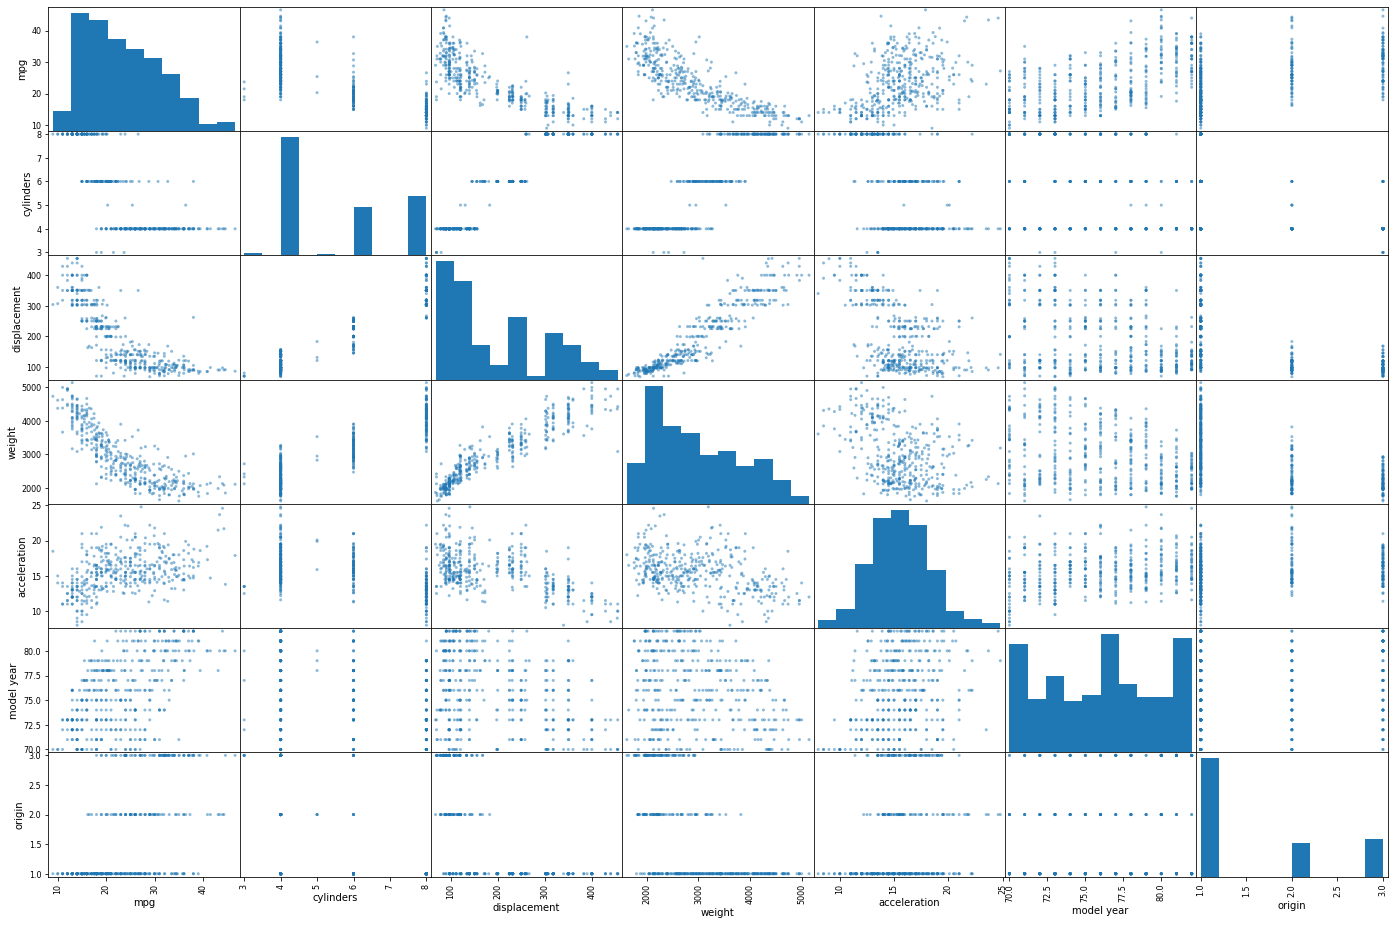

In [31]:
from pandas.plotting import scatter_matrix

attributes = ['mpg','cylinders','displacement','weight',
              'acceleration','model year','origin']

scatter_matrix(df[attributes], figsize=(24,16))

### 데이터 구간 분할

In [33]:
# horsepower 열의 누락 데이터('?') 삭제하고 실수형으로 변환
df['horsepower'].replace('?', np.nan, inplace=True)      # '?'을 np.nan으로 변경
df.dropna(subset=['horsepower'], axis=0, inplace=True)   # 누락데이터 행을 삭제
df['horsepower'] = df['horsepower'].astype('float')      # 문자열을 실수형으로 변환

In [34]:
# np.histogram 함수로 3개의 bin으로 나누는 경계 값의 리스트 구하기
count, bin_dividers = np.histogram(df['horsepower'], bins=3)
print(bin_dividers) 

[ 46.         107.33333333 168.66666667 230.        ]


In [35]:
# 3개의 bin에 이름 지정
bin_names = ['저출력', '보통출력', '고출력']

# pd.cut 함수로 각 데이터를 3개의 bin에 할당
df['hp_bin'] = pd.cut(x=df['horsepower'],     # 데이터 배열
                      bins=bin_dividers,      # 경계 값 리스트
                      labels=bin_names,       # bin 이름
                      include_lowest=True)    # 첫 경계값 포함 

# horsepower 열, hp_bin 열의 첫 15행을 출력
print(df[['horsepower', 'hp_bin']].head(15))

    horsepower hp_bin
0        130.0   보통출력
1        165.0   보통출력
2        150.0   보통출력
3        150.0   보통출력
4        140.0   보통출력
5        198.0    고출력
6        220.0    고출력
7        215.0    고출력
8        225.0    고출력
9        190.0    고출력
10       170.0    고출력
11       160.0   보통출력
12       150.0   보통출력
13       225.0    고출력
14        95.0    저출력


In [36]:
pd.value_counts(df['hp_bin'])

저출력     257
보통출력    103
고출력      32
Name: hp_bin, dtype: int64

### 더미 변수

In [37]:
# hp_bin 열의 범주형 데이터를 더미 변수로 변환
horsepower_dummies = pd.get_dummies(df['hp_bin'])
print(horsepower_dummies.head(15))

    저출력  보통출력  고출력
0     0     1    0
1     0     1    0
2     0     1    0
3     0     1    0
4     0     1    0
5     0     0    1
6     0     0    1
7     0     0    1
8     0     0    1
9     0     0    1
10    0     0    1
11    0     1    0
12    0     1    0
13    0     0    1
14    1     0    0


### 정규화, 표준화

In [ ]:
def minmax_normalize(arr):
    return (arr-arr.min())/(arr.max()-arr.min())

def zscore_standize(arr):
    return (arr - arr.mean())/arr.std()